In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.shape

(30162, 15)

In [21]:
ohe = OneHotEncoder()
le = LabelEncoder()
df.income = le.fit_transform(df.income)
df = pd.get_dummies(df, columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
# Split the dataset into 10 different training/testing sets and store them as CSV files
for i in range(10):
    # Use a 70/30 train-test split
    train_df, test_df = train_test_split(df, test_size=0.3)
    # Save the training and testing sets as CSV files
    train_df.to_csv(f"train_{i}.csv", index=False)
    test_df.to_csv(f"test_{i}.csv", index=False)

In [23]:
import random

# Define the parameter ranges
C_range = [0.1,0.2,0.3,0.4, 0.5,0.6,0.7,0.9,0.8 ,1, 2, 3]
kernel_range = ['rbf', 'poly', 'sigmoid', 'linear']
gamma_range = [1, 0.1, 0.01,0.011,0.012, 0.001, 0.0001]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'C', 'Gamma', 'Kernel'])
best_sample_df = pd.DataFrame(columns=['Iteration', 'Accuracy'])
best_sample=0
overall_acc=0

for i in range(10):
    # Load the training and testing sets
    train_df = pd.read_csv(f"train_{i}.csv")
    test_df = pd.read_csv(f"test_{i}.csv")

    # Separate the features and target variable
    X_train = train_df.drop('income', axis=1)
    y_train = train_df['income']
    X_test = test_df.drop('income', axis=1)
    y_test = test_df['income']

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize variables to store the best accuracy and parameter values
    max_acc = 0
    best_C = None
    best_kernel = None
    best_gamma = None
    
    # Iterate through parameter combinations
    for j in range(1000):
        # Randomly select parameter values
        C = random.choice(C_range)
        kernel = random.choice(kernel_range)
        gamma = random.choice(gamma_range)

        # Train the model
        svc = SVC(C=C, kernel=kernel, gamma=gamma,max_iter=1)
        svc.fit(X_train_scaled, y_train)

        # Test the model
        y_pred = svc.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)

        # Update the best accuracy and parameter values
        if acc > max_acc:
            max_acc = acc
            best_C = C
            best_kernel = kernel
            best_gamma = gamma
            
        if max_acc>overall_acc:
            best_sample = i
        if i==best_sample and j%50==0:
            best_sample_df.loc[j/50] = [j, acc]
    
    overall_acc=max_acc

    # Store the results in the DataFrame
    results_df.loc[i] = [i+1, max_acc, best_C, best_gamma, best_kernel]



e:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
e:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  

In [ ]:
results_df['Best Accuracy']=np.round(results_df['Best Accuracy']*100,2)

In [28]:
results_df

,Sample,Best Accuracy,C,Gamma,Kernel
0,1,75.52,0.6,1.00,rbf
1,2,74.81,0.6,0.10,rbf
2,3,74.44,0.1,0.10,rbf
3,4,74.80,0.5,1.00,rbf
4,5,75.28,0.7,1.00,rbf
5,6,75.36,1.0,1.00,rbf
6,7,75.42,0.5,0.10,rbf
7,8,74.64,0.6,1.00,rbf
8,9,75.29,0.7,0.01,poly
9,10,74.48,0.7,1.00,rbf


In [25]:
best_sample_df.Accuracy=np.round(best_sample_df.Accuracy*100,2)

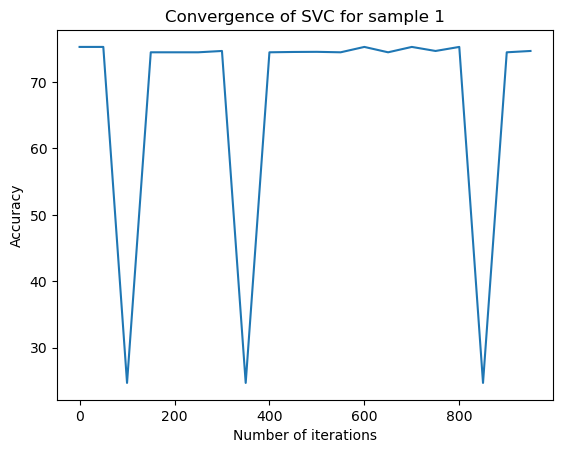

In [29]:
plt.plot(np.array(best_sample_df.Iteration), np.array(best_sample_df.Accuracy))
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC for sample 1')
plt.show()